In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv('g3.csv')

In [75]:
df

,Date,Frame No,BAT,COND,DO,ORP,PH,WT,Cluster,Unnamed: 9,ADD
0,21-05-19 11:53,0,98,1.620359,97.282104,0.137211,10.061290,28.213074,2,NaN,137.314039
1,21-05-19 11:54,1,96,1.586915,97.476720,0.135318,10.035237,28.137848,2,NaN,137.372038
2,21-05-19 11:55,2,96,1.558073,97.546370,0.134258,10.022614,28.149506,2,NaN,137.410821
3,21-05-19 11:56,3,96,1.536727,97.521300,0.133044,10.019047,28.144989,2,NaN,137.355106
4,21-05-19 11:57,4,98,1.510011,97.643640,0.132248,10.018088,28.144043,2,NaN,137.448031
...,...,...,...,...,...,...,...,...,...,...,...
4974,25-05-19 0:51,143,86,76.474670,101.003090,-0.284334,9.963284,26.190490,0,NaN,213.347200
4975,25-05-19 0:52,144,86,76.304344,101.060036,-0.281613,9.960735,26.205017,0,NaN,213.248519
4976,25-05-19 0:53,145,86,76.132810,100.933650,-0.278773,9.958983,26.215302,0,NaN,212.961972
4977,25-05-19 0:54,146,84,76.036200,100.961590,-0.275675,9.962255,26.193726,0,NaN,212.878096


In [76]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

In [83]:
X=df[['COND','DO','ORP','PH','WT']]

In [84]:
X

,COND,DO,ORP,PH,WT
0,1.620359,97.282104,0.137211,10.061290,28.213074
1,1.586915,97.476720,0.135318,10.035237,28.137848
2,1.558073,97.546370,0.134258,10.022614,28.149506
3,1.536727,97.521300,0.133044,10.019047,28.144989
4,1.510011,97.643640,0.132248,10.018088,28.144043
...,...,...,...,...,...
4974,76.474670,101.003090,-0.284334,9.963284,26.190490
4975,76.304344,101.060036,-0.281613,9.960735,26.205017
4976,76.132810,100.933650,-0.278773,9.958983,26.215302
4977,76.036200,100.961590,-0.275675,9.962255,26.193726


In [85]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [86]:
y=kmeans.labels_

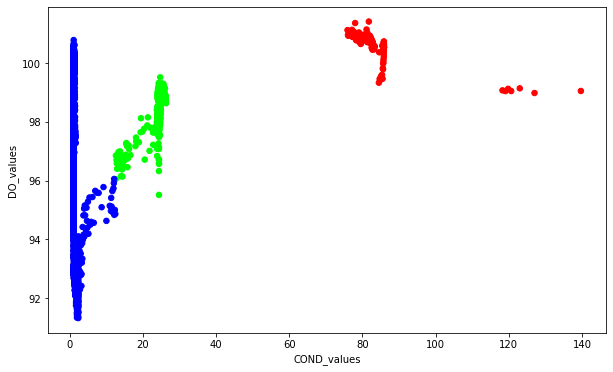

In [115]:
plt.figure(figsize = (10, 6))
plt.scatter(df['COND'], df['DO'], c = y, s = 30, cmap = 'brg')
#plt.scatter(XX[:,0],XX[:,1], color='Black')
plt.xlabel('COND_values')
plt.ylabel('DO_values')
plt.show()

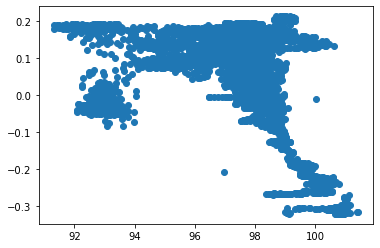

In [82]:
plt.scatter(X[:,1], X[:,2])
plt.show()

In [88]:
lof = LocalOutlierFactor(n_neighbors=5, contamination=.03)

In [89]:
y_pred = lof.fit_predict(X)

In [90]:
lofs_index = where(y_pred==-1)
lf=lofs_index[0]

In [94]:
lofs_index

(array([   0,   60,   91,  106,  226,  238,  241,  297,  414,  418,  443,
         484,  547,  548,  551,  565,  566,  567,  645,  681,  682,  683,
         784,  895, 1084, 1139, 1194, 1229, 1231, 1443, 1467, 1620, 1622,
        1626, 1631, 1642, 1644, 1646, 1651, 1655, 1831, 1899, 1978, 2054,
        2071, 2077, 2078, 2080, 2095, 2096, 2519, 2607, 2628, 2831, 2840,
        2842, 2846, 2852, 2856, 2876, 2916, 2923, 2929, 2998, 3008, 3024,
        3033, 3051, 3053, 3062, 3089, 3092, 3106, 3200, 3336, 3337, 3379,
        3428, 3431, 3432, 3434, 3481, 3522, 3534, 3544, 3547, 3667, 3686,
        3689, 3706, 3761, 3763, 3831, 3847, 3850, 3851, 3853, 3922, 3993,
        4015, 4016, 4017, 4018, 4022, 4046, 4053, 4093, 4111, 4132, 4143,
        4144, 4191, 4192, 4200, 4205, 4206, 4225, 4238, 4240, 4257, 4275,
        4290, 4294, 4395, 4449, 4487, 4500, 4502, 4549, 4566, 4574, 4577,
        4578, 4645, 4689, 4749, 4767, 4768, 4769, 4770, 4783, 4784, 4787,
        4805, 4806, 4824, 4850, 4851, 

In [95]:
lf=np.reshape(lf,(150,1))

In [102]:
lf

array([[   0],
       [  60],
       [  91],
       [ 106],
       [ 226],
       [ 238],
       [ 241],
       [ 297],
       [ 414],
       [ 418],
       [ 443],
       [ 484],
       [ 547],
       [ 548],
       [ 551],
       [ 565],
       [ 566],
       [ 567],
       [ 645],
       [ 681],
       [ 682],
       [ 683],
       [ 784],
       [ 895],
       [1084],
       [1139],
       [1194],
       [1229],
       [1231],
       [1443],
       [1467],
       [1620],
       [1622],
       [1626],
       [1631],
       [1642],
       [1644],
       [1646],
       [1651],
       [1655],
       [1831],
       [1899],
       [1978],
       [2054],
       [2071],
       [2077],
       [2078],
       [2080],
       [2095],
       [2096],
       [2519],
       [2607],
       [2628],
       [2831],
       [2840],
       [2842],
       [2846],
       [2852],
       [2856],
       [2876],
       [2916],
       [2923],
       [2929],
       [2998],
       [3008],
       [3024],
       [30

In [103]:
X=X.values

In [104]:
XX=[]
for i in range(150):
    XX.append(X[lf[i]])

In [105]:
XX.np

AttributeError: 'list' object has no attribute 'np'

In [106]:
XX=np.array(XX)

In [107]:
XX.shape

(150, 1, 5)

In [108]:
XX=np.reshape(XX,(150,5))

In [109]:
XX

array([[ 1.62035940e+00,  9.72821040e+01,  1.37211080e-01,
         1.00612900e+01,  2.82130740e+01],
       [ 1.29736750e+00,  1.00615990e+02,  1.33095030e-01,
         9.98607400e+00,  2.77033390e+01],
       [ 1.07756980e+00,  9.91587800e+01,  1.42036910e-01,
         9.98592800e+00,  2.75864260e+01],
       [ 1.07216990e+00,  9.88379300e+01,  1.46600250e-01,
         9.97802000e+00,  2.74974060e+01],
       [ 1.05424500e+00,  9.92016200e+01,  1.71155930e-01,
         9.97808100e+00,  2.73649600e+01],
       [ 1.05327810e+00,  9.91347350e+01,  1.73299550e-01,
         9.97172600e+00,  2.73434450e+01],
       [ 1.05177590e+00,  9.91168000e+01,  1.73855300e-01,
         9.97643500e+00,  2.73573000e+01],
       [ 1.05105050e+00,  9.71294200e+01,  1.80248740e-01,
         9.97446400e+00,  2.73194890e+01],
       [ 2.43624550e+01,  9.55130840e+01,  1.64128780e-01,
         1.00014500e+01,  2.71508180e+01],
       [ 2.43593920e+01,  9.71356400e+01,  1.66526800e-01,
         9.99967200e+00

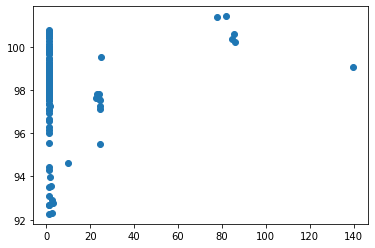

In [110]:
plt.scatter(XX[:,0], XX[:,1])
plt.show()

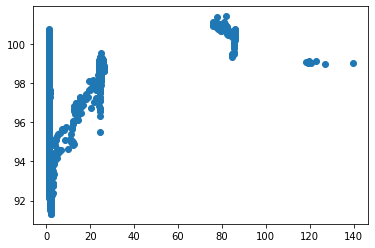

In [111]:
plt.scatter(X[:,0], X[:,1])
plt.show()

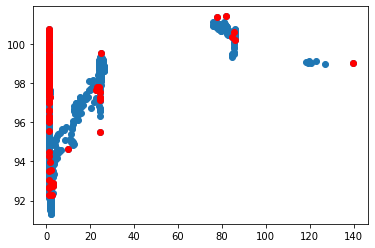

In [112]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(XX[:,0],XX[:,1], color='r')
plt.show()

In [113]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

[0 0 0 ... 1 1 1]


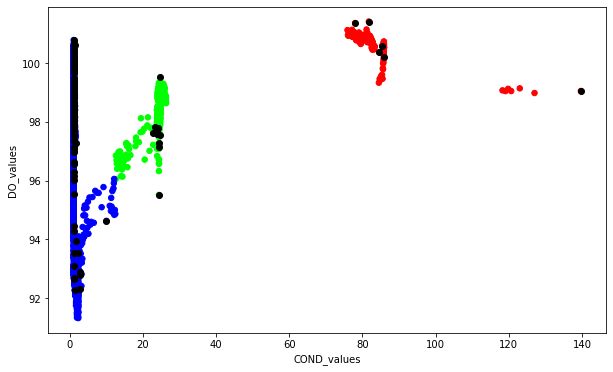

In [116]:
plt.figure(figsize = (10, 6))
plt.scatter(df['COND'], df['DO'], c = y, s = 30, cmap = 'brg')
plt.scatter(XX[:,0],XX[:,1], color='Black')
plt.xlabel('COND_values')
plt.ylabel('DO_values')
plt.show()